# MNIST MLP

Use a Multi-layer Perceptron to the classify MNIST dataset 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import plot_model
from keras.utils import np_utils

## Load MNIST data

Keras comes with the MNIST data loader. Keras has a function `mnist.load_data()` which downloads the data from its servers if it is not present already. The data loaded using this function is divided into training and test sets.

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image. Let's look at some examples of the training data

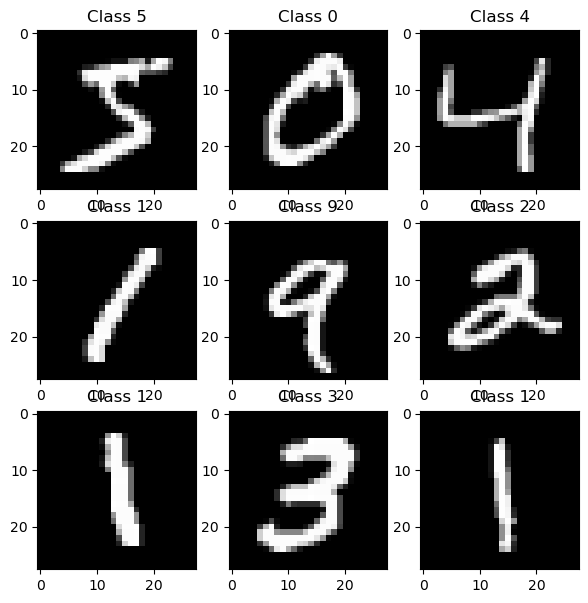

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.

In [77]:
from keras.models import Sequential
from keras import layers

model = Sequential(
    [
        layers.Dense(256, activation="relu", name="layer1"),
        layers.Dropout(0.5),
        layers.Activation("relu"),
        layers.Dense(128, activation="relu", name="layer2"),
        layers.Dropout(0.5),
        layers.Activation("relu"),
        layers.Dense(10, activation="relu"),
        layers.Activation("softmax")
    ]
)

model.build((None, 784))

## Visualize the network

In [78]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 256)               200960    
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 activation_14 (Activation)  (None, 256)               0         
                                                                 
 layer2 (Dense)              (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 activation_15 (Activation)  (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 10)              

## Compile the model
Keras is using TensorFlow as a backend. 

When compiling a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Train Model
Feed the training data loaded in earlier into this model and it will learn to classify digits

In [80]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available.")
    gpu_device = tf.config.list_physical_devices('GPU')[0]
    print("GPU device name:", gpu_device.name)
else:
    print("GPU is not available.")

GPU is available.
GPU device name: /physical_device:GPU:0


In [81]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.5532 - val_loss: 0.1783
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2497 - val_loss: 0.1274
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1965 - val_loss: 0.1100
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1679 - val_loss: 0.0958
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1516 - val_loss: 0.0864
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1328 - val_loss: 0.0853
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1277 - val_loss: 0.0773
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1166 - val_loss: 0.0810
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1061 - val_loss: 0.0785
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1029 - val_loss: 0.0751

## Evaluate performance

In [82]:
score = model.evaluate(X_test, Y_test,verbose=1)

print('Test loss:', score)

313/313 [==============================] - 1s 2ms/step - loss: 0.0658
Test loss: 0.06577584147453308


## Plot the loss curve

Text(0.5, 1.0, 'Loss Curves')

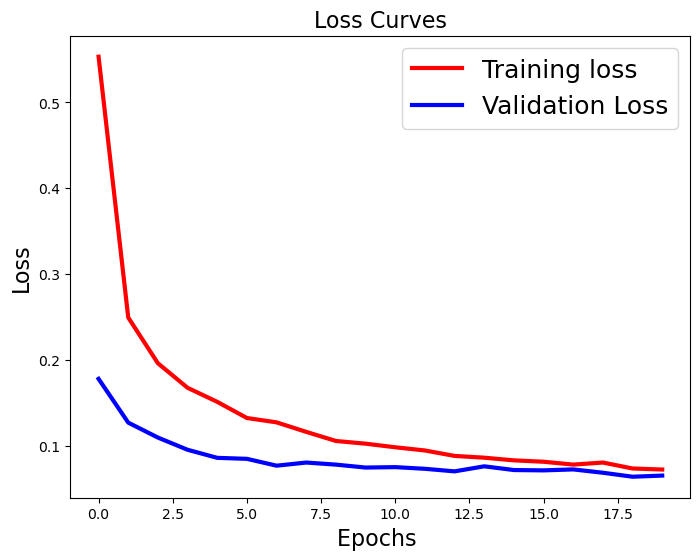

In [84]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

## Inspect the output

Inspect the output and look at some examples it gets right, and some examples it gets wrong. The predict_classes function outputs the highest probability class according to the trained classifier for each input example.

In [85]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
print(predicted_classes)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

#print(correct_indices)
#print(incorrect_indices)

313/313 [==============================] - 1s 1ms/step
[7 2 1 ... 4 5 6]


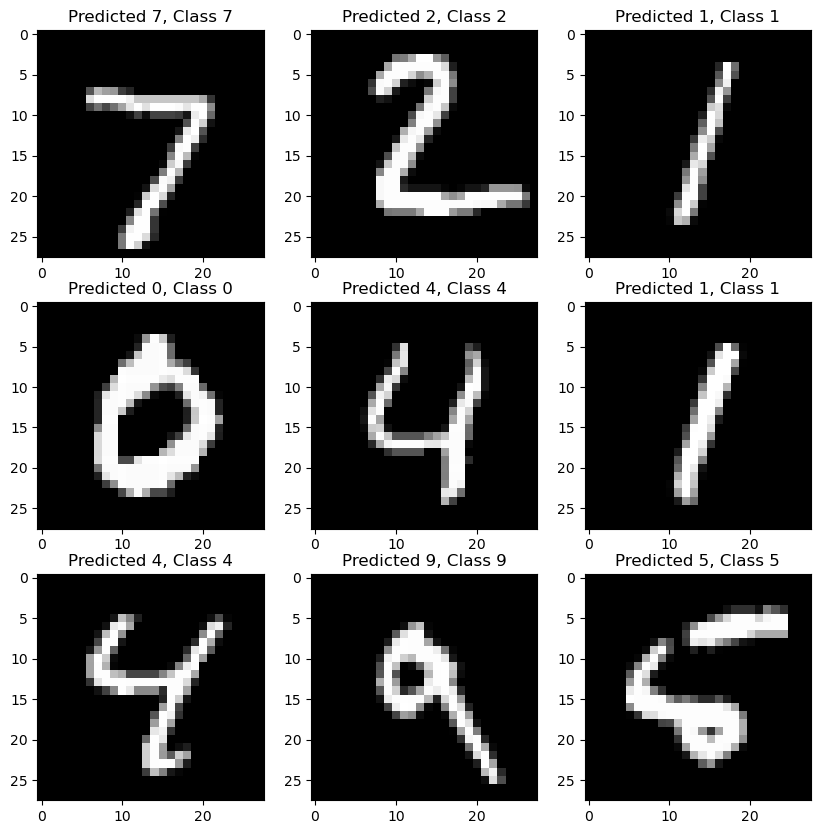

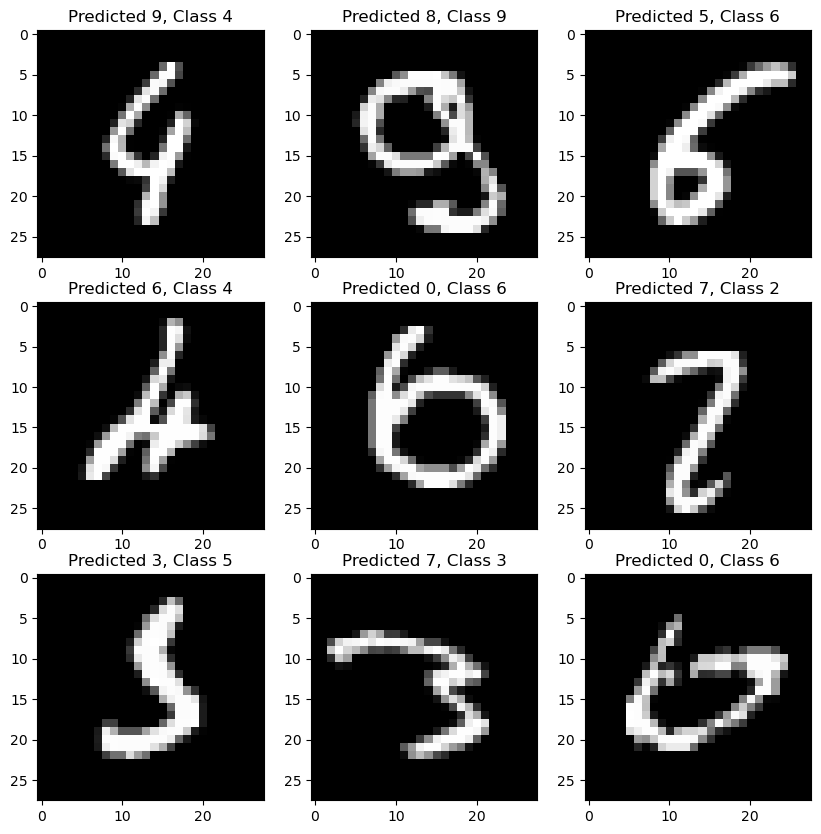

In [86]:
#some of the correct results
plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
#some of the incorrect predictions
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))